## K-Means: Ejercicio 1


#### Tareas

- Conceptos básicos de Clustering con K-Means
- Visualización de cluster
- Método del codo (cómo elegir k óptimo)

#### Librerías a utilizar

In [2]:
# Librería para procesos matemáticos
import numpy as np
# Librería para la manipulación de datos
import pandas as pd
# Librería para gráficas
import matplotlib.pyplot as plt
# Librería para crear puntos
from sklearn.datasets import make_blobs
# Librería para K-Means
from sklearn.cluster import KMeans

#### Creación del dataset

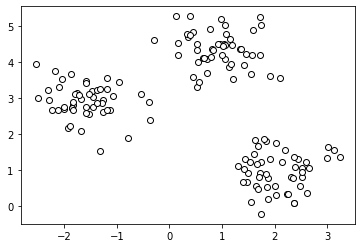

In [10]:
# Se crean 150 puntos aleatorios, para dos características y 3 centroides
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# Se genera la gráfica de dispersión bidimensional
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black'
)
plt.show()

#### Predicción con K-Means

In [13]:
# Se crea y entrena el modelo
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Se genera a predicción
y_predict = km.fit_predict(X)

#### Visualización de los grupos

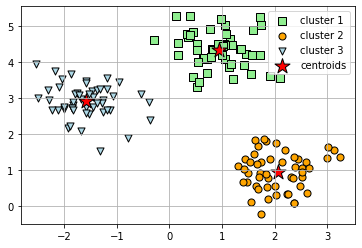

In [19]:
# Se genera la gráfica para los tres grupos
# Cluster 1
plt.scatter(
    X[y_predict == 0, 0], X[y_predict == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
# Cluster 2
plt.scatter(
    X[y_predict == 1, 0], X[y_predict == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
# Cluster 3
plt.scatter(
    X[y_predict == 2, 0], X[y_predict == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Se grafican los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Método de codo

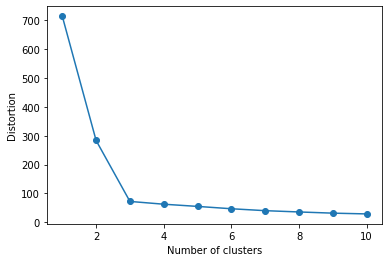

In [20]:
# Calcula la distorción para el rango de K cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# Se genera la gráfica del codo
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()